# **目標一**:
### 使用 QNLI 資料集和 BERT-base-uncased 訓練 模型


# 安裝套件

In [ ]:
pip install transformers datasets accelerate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.4 MB 4.9 MB/s 
     |████████████████████████████████| 362 kB 55.5 MB/s 
     |████████████████████████████████| 117 kB 16.8 MB/s 
     |████████████████████████████████| 596 kB 54.8 MB/s 
     |████████████████████████████████| 101 kB 5.3 MB/s 
     |████████████████████████████████| 6.6 MB 50.8 MB/s 
     |████████████████████████████████| 1.1 MB 50.2 MB/s 
     |████████████████████████████████| 140 kB 49.7 MB/s 
     |████████████████████████████████| 212 kB 60.8 MB/s 
     |████████████████████████████████| 127 kB 32.1 MB/s 
     |████████████████████████████████| 144 kB 32.5 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 271 kB 53.0 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3

# 確認 GPU 分配

In [ ]:
!nvidia-smi

Thu Jul  7 06:07:17 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Mount 雲端硬碟

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# 資料前處理

In [ ]:
from datasets import load_dataset
import pandas as pd

datasets = load_dataset('glue', 'qnli')

train_data = pd.DataFrame(datasets['train']).drop(columns = ['idx'])
validation_data = pd.DataFrame(datasets['validation']).drop(columns = ['idx'])
test_data = pd.DataFrame(datasets['test']).drop(columns = ['idx'])

print(datasets)

In [ ]:
print(train_data.info())
train_data

In [ ]:
validation_data

In [ ]:
test_data

In [ ]:
print("acceptation")
print("Sentence", train_data['sentence'][2])
print("Label：", train_data['label'][2], '\n')

print("not_acceptation")
print("Sentence", train_data['sentence'][7])
print("Label：", train_data['label'][7], '\n')

In [ ]:
train_sentence, train_label = train_data['sentence'].tolist(), train_data['label'].tolist()
eval_sentence, eval_label = validation_data['sentence'].tolist(), validation_data['label'].tolist()
# 將dataframe格式轉成list(tokenize時使用)

print(len(train_sentence))
print(type(train_sentence))

In [ ]:
print(set(eval_label))

# 將資料進行 Tokenize
## 將 input 資料轉換成 token id 、tpye_id 與 attention_mask

In [ ]:
from transformers import BertTokenizerFast
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

train_encodings = tokenizer(train_sentence, padding=True, truncation=True)
eval_encodings = tokenizer(eval_sentence, padding=True, truncation=True)

# max_length 參考:
# https://huggingface.co/docs/transformers/preprocessing

In [ ]:
tokenizer

In [ ]:
train_encodings.keys()

In [ ]:
print("input_ids\n", train_encodings['input_ids'][0])
print("input_ids_decode\n", tokenizer.decode(train_encodings['input_ids'][0]))
print("token_type_ids\n", train_encodings['token_type_ids'][0])
print("attention_mask\n", train_encodings['attention_mask'][0])

print(type(train_encodings))

In [ ]:
print(len(train_encodings['input_ids'][0]))
print(len(train_encodings['token_type_ids'][0]))

512
512


## 加入 Label

In [ ]:
def add_targets(encodings, label):
  encodings.update({'label': label})

add_targets(train_encodings, train_label)
add_targets(eval_encodings, eval_label)

print(train_encodings.keys())

dict_keys(['input_ids', 'token_type_ids', 'attention_mask', 'label'])


In [ ]:
print(train_encodings['input_ids'][0])
print(train_encodings['token_type_ids'][0])
print(train_encodings['attention_mask'][0])
print(train_encodings['label'][0])

[101, 4406, 1996, 2048, 3692, 2077, 2009, 1998, 2087, 1997, 1996, 3692, 2008, 2628, 1010, 10667, 16339, 2078, 24763, 2869, 3138, 1037, 9904, 1998, 2062, 12689, 3921, 2000, 2049, 2466, 3794, 10667, 16339, 2078, 2040, 2079, 2025, 27788, 10010, 12556, 2044, 2037, 6677, 1998, 2062, 3375, 2839, 2458, 1999, 1996, 2434, 2887, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 定義 Dataset，並轉換成 tensor 格式

In [ ]:
from torch.utils import data
import torch

class Dataset(torch.utils.data.Dataset):
  def __init__(self, encodings):
    self.encodings = encodings

  def __getitem__(self, idx):
    return {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}

  def __len__(self):
    return len(self.encodings.input_ids)

train_dataset = Dataset(train_encodings)
eval_dataset = Dataset(eval_encodings)

In [ ]:
train_dataset[0]

{'attention_mask': tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0

# 載入模型架構( SequenceClassification )

In [ ]:
from transformers import BertConfig, BertForSequenceClassification
config = BertConfig.from_pretrained('bert-base-uncased', num_labels=2)  #num_labels 設定類別數
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', config=config)

Downloading:   0%|          | 0.00/420M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

## 查看模型架構

In [ ]:
print(model)

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

# 訓練模型

In [ ]:
import logging
import datasets
from datasets import load_dataset, load_metric
from torch.utils.data import DataLoader
from tqdm.auto import tqdm, trange
import math

import transformers
from accelerate import Accelerator
from transformers import (
    AdamW,
    AutoConfig,
    default_data_collator,
    get_scheduler
)

## 設定 epoch 與 batch size

In [ ]:
train_batch_size = 6      # 設定 training batch size
eval_batch_size = 6      # 設定 eval batch size
num_train_epochs = 5      # 設定 epoch

## 將資料丟入 DataLoader


In [ ]:
data_collator = default_data_collator
train_dataloader = DataLoader(train_dataset, shuffle=True, collate_fn=data_collator, batch_size=train_batch_size)
eval_dataloader = DataLoader(eval_dataset, collate_fn=data_collator, batch_size=eval_batch_size)

## Optimizer 、Learning rate 、Scheduler 設定

In [ ]:
learning_rate=3e-4          # 設定 learning_rate
gradient_accumulation_steps = 1   # 設定 幾步後進行反向傳播

no_decay = ["bias", "LayerNorm.weight"]
optimizer_grouped_parameters = [
    {
        "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
        "weight_decay": 0.0,
    },                                
    {
        "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
        "weight_decay": 0.0,
    },
]
optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate)

# Scheduler and math around the number of training steps.
num_update_steps_per_epoch = math.ceil(len(train_dataloader) / gradient_accumulation_steps)
max_train_steps = num_train_epochs * num_update_steps_per_epoch
print('max_train_steps', max_train_steps)

# scheduler
lr_scheduler = get_scheduler(
    name="linear",
    optimizer=optimizer,
    num_warmup_steps=0,
    num_training_steps=max_train_steps,
)

max_train_steps 7130


/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


## 將資料、參數丟入 Accelerator



In [ ]:
# Initialize the accelerator. We will let the accelerator handle device placement for us in this example.
accelerator = Accelerator()

# Prepare everything with our `accelerator`.
model, optimizer, train_dataloader, eval_dataloader = accelerator.prepare(
    model, optimizer, train_dataloader, eval_dataloader
)

In [ ]:
eval_dataloader

## 設定 metric 方法

In [ ]:
# Get the metric function
metric = load_metric("accuracy")

## 開始訓練

In [ ]:
# Train!
logger = logging.getLogger(__name__)
logging.basicConfig(
    format="%(asctime)s - %(levelname)s - %(name)s - %(message)s",
    datefmt="%m/%d/%Y %H:%M:%S",
    level=logging.INFO,
)
logger.info(accelerator.state)
output_dir = '/content/drive/Shareddrives/中興大學/晨華偷用中/QNLI'  # your folder


total_batch_size = train_batch_size * accelerator.num_processes * gradient_accumulation_steps

logger.info("***** Running training *****")
logger.info(f"  Num examples = {len(train_dataset)}")
logger.info(f"  Num Epochs = {num_train_epochs}")
logger.info(f"  Instantaneous batch size per device = {train_batch_size}")
logger.info(f"  Total train batch size (w. parallel, distributed & accumulation) = {total_batch_size}")
logger.info(f"  Gradient Accumulation steps = {gradient_accumulation_steps}")
logger.info(f"  Total optimization steps = {max_train_steps}")


completed_steps = 0
best_epoch = {"epoch": 0, "acc": 0 }

for epoch in trange(num_train_epochs, desc="Epoch"):
  model.train()
  for step, batch in enumerate(tqdm(train_dataloader, desc="Iteration")):
    outputs = model(**batch)
    loss = outputs.loss
    loss = loss / gradient_accumulation_steps
    accelerator.backward(loss)
    if step % gradient_accumulation_steps == 0 or step == len(train_dataloader) - 1:
      optimizer.step()
      lr_scheduler.step()
      optimizer.zero_grad()
      completed_steps += 1

    if step % 50 == 0:
      print({'epoch': epoch, 'step': step, 'loss': loss.item()})

    if completed_steps >= max_train_steps:
      break
      
  logger.info("***** Running eval *****")
  model.eval()
  for step, batch in enumerate(tqdm(eval_dataloader, desc="Eval Iteration")):
    outputs = model(**batch)
    predictions = outputs.logits.argmax(dim=-1)
    metric.add_batch(
        predictions=accelerator.gather(predictions),
        references=accelerator.gather(batch["labels"]),
    )

  eval_metric = metric.compute()
  logger.info(f"epoch {epoch}: {eval_metric}")
  if eval_metric['accuracy'] > best_epoch['acc']:
    best_epoch.update({"epoch": epoch, "acc": eval_metric['accuracy']})

  if output_dir is not None:
    accelerator.wait_for_everyone()
    unwrapped_model = accelerator.unwrap_model(model)
    unwrapped_model.save_pretrained(output_dir + '/' + 'epoch_' + str(epoch), save_function=accelerator.save)

07/04/2022 09:06:44 - INFO - __main__ - Distributed environment: NO
Num processes: 1
Process index: 0
Local process index: 0
Device: cuda

07/04/2022 09:06:44 - INFO - __main__ - ***** Running training *****
07/04/2022 09:06:44 - INFO - __main__ -   Num examples = 8551
07/04/2022 09:06:44 - INFO - __main__ -   Num Epochs = 5
07/04/2022 09:06:44 - INFO - __main__ -   Instantaneous batch size per device = 6
07/04/2022 09:06:44 - INFO - __main__ -   Total train batch size (w. parallel, distributed & accumulation) = 6
07/04/2022 09:06:44 - INFO - __main__ -   Gradient Accumulation steps = 1
07/04/2022 09:06:44 - INFO - __main__ -   Total optimization steps = 7130


Epoch:   0%|          | 0/5 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1426 [00:00<?, ?it/s]

{'epoch': 0, 'step': 0, 'loss': 0.6323763132095337}
{'epoch': 0, 'step': 50, 'loss': 0.643517255783081}
{'epoch': 0, 'step': 100, 'loss': 0.4660275876522064}
{'epoch': 0, 'step': 150, 'loss': 0.3716374933719635}
{'epoch': 0, 'step': 200, 'loss': 0.39715221524238586}
{'epoch': 0, 'step': 250, 'loss': 0.6683123707771301}
{'epoch': 0, 'step': 300, 'loss': 0.6858132481575012}
{'epoch': 0, 'step': 350, 'loss': 0.35302722454071045}
{'epoch': 0, 'step': 400, 'loss': 0.8617053627967834}
{'epoch': 0, 'step': 450, 'loss': 0.7807502150535583}
{'epoch': 0, 'step': 500, 'loss': 0.6473953127861023}
{'epoch': 0, 'step': 550, 'loss': 0.627572238445282}
{'epoch': 0, 'step': 600, 'loss': 0.7525475025177002}
{'epoch': 0, 'step': 650, 'loss': 0.5170926451683044}
{'epoch': 0, 'step': 700, 'loss': 0.47561201453208923}
{'epoch': 0, 'step': 750, 'loss': 0.29197075963020325}
{'epoch': 0, 'step': 800, 'loss': 0.4889419376850128}
{'epoch': 0, 'step': 850, 'loss': 0.48562002182006836}
{'epoch': 0, 'step': 900, 'l

07/04/2022 09:08:46 - INFO - __main__ - ***** Running eval *****


Eval Iteration:   0%|          | 0/174 [00:00<?, ?it/s]

07/04/2022 09:08:49 - INFO - __main__ - epoch 0: {'accuracy': 0.6912751677852349}


Iteration:   0%|          | 0/1426 [00:00<?, ?it/s]

{'epoch': 1, 'step': 0, 'loss': 0.6635496616363525}
{'epoch': 1, 'step': 50, 'loss': 0.764136791229248}
{'epoch': 1, 'step': 100, 'loss': 0.7549005150794983}
{'epoch': 1, 'step': 150, 'loss': 0.6270007491111755}
{'epoch': 1, 'step': 200, 'loss': 0.7821261286735535}
{'epoch': 1, 'step': 250, 'loss': 0.3847621977329254}
{'epoch': 1, 'step': 300, 'loss': 0.6526565551757812}
{'epoch': 1, 'step': 350, 'loss': 0.6396861672401428}
{'epoch': 1, 'step': 400, 'loss': 0.6315893530845642}
{'epoch': 1, 'step': 450, 'loss': 0.5153552889823914}
{'epoch': 1, 'step': 500, 'loss': 0.4940888583660126}
{'epoch': 1, 'step': 550, 'loss': 0.6493538022041321}
{'epoch': 1, 'step': 600, 'loss': 0.8543068766593933}
{'epoch': 1, 'step': 650, 'loss': 0.8206749558448792}
{'epoch': 1, 'step': 700, 'loss': 0.5387616753578186}
{'epoch': 1, 'step': 750, 'loss': 0.47766315937042236}
{'epoch': 1, 'step': 800, 'loss': 0.5158478617668152}
{'epoch': 1, 'step': 850, 'loss': 0.48464950919151306}
{'epoch': 1, 'step': 900, 'los

07/04/2022 09:10:54 - INFO - __main__ - ***** Running eval *****


Eval Iteration:   0%|          | 0/174 [00:00<?, ?it/s]

07/04/2022 09:10:57 - INFO - __main__ - epoch 1: {'accuracy': 0.6912751677852349}


Iteration:   0%|          | 0/1426 [00:00<?, ?it/s]

{'epoch': 2, 'step': 0, 'loss': 0.5036898255348206}
{'epoch': 2, 'step': 50, 'loss': 0.39145228266716003}
{'epoch': 2, 'step': 100, 'loss': 0.5882627367973328}
{'epoch': 2, 'step': 150, 'loss': 0.5946312546730042}
{'epoch': 2, 'step': 200, 'loss': 0.6537887454032898}
{'epoch': 2, 'step': 250, 'loss': 0.5360487103462219}
{'epoch': 2, 'step': 300, 'loss': 0.6556985974311829}
{'epoch': 2, 'step': 350, 'loss': 0.5066477656364441}
{'epoch': 2, 'step': 400, 'loss': 0.5393765568733215}
{'epoch': 2, 'step': 450, 'loss': 1.0894297361373901}
{'epoch': 2, 'step': 500, 'loss': 0.6533589363098145}
{'epoch': 2, 'step': 550, 'loss': 0.4747508764266968}
{'epoch': 2, 'step': 600, 'loss': 0.48052462935447693}
{'epoch': 2, 'step': 650, 'loss': 0.6502919793128967}
{'epoch': 2, 'step': 700, 'loss': 1.0555633306503296}
{'epoch': 2, 'step': 750, 'loss': 0.6438812613487244}
{'epoch': 2, 'step': 800, 'loss': 0.6347244381904602}
{'epoch': 2, 'step': 850, 'loss': 0.7852428555488586}
{'epoch': 2, 'step': 900, 'lo

07/04/2022 09:13:03 - INFO - __main__ - ***** Running eval *****


Eval Iteration:   0%|          | 0/174 [00:00<?, ?it/s]

07/04/2022 09:13:05 - INFO - __main__ - epoch 2: {'accuracy': 0.6912751677852349}


Iteration:   0%|          | 0/1426 [00:00<?, ?it/s]

{'epoch': 3, 'step': 0, 'loss': 0.594623863697052}
{'epoch': 3, 'step': 50, 'loss': 0.4870609939098358}
{'epoch': 3, 'step': 100, 'loss': 0.4715886116027832}
{'epoch': 3, 'step': 150, 'loss': 0.9941731095314026}
{'epoch': 3, 'step': 200, 'loss': 0.4911671578884125}
{'epoch': 3, 'step': 250, 'loss': 0.6363620758056641}
{'epoch': 3, 'step': 300, 'loss': 0.33931419253349304}
{'epoch': 3, 'step': 350, 'loss': 0.6531527638435364}
{'epoch': 3, 'step': 400, 'loss': 0.4992138147354126}
{'epoch': 3, 'step': 450, 'loss': 0.5072320103645325}
{'epoch': 3, 'step': 500, 'loss': 0.5064704418182373}
{'epoch': 3, 'step': 550, 'loss': 0.4909922182559967}
{'epoch': 3, 'step': 600, 'loss': 0.34469762444496155}
{'epoch': 3, 'step': 650, 'loss': 0.49143552780151367}
{'epoch': 3, 'step': 700, 'loss': 0.6501954793930054}
{'epoch': 3, 'step': 750, 'loss': 0.4949909746646881}
{'epoch': 3, 'step': 800, 'loss': 0.9268222451210022}
{'epoch': 3, 'step': 850, 'loss': 0.6446362733840942}
{'epoch': 3, 'step': 900, 'lo

07/04/2022 09:15:11 - INFO - __main__ - ***** Running eval *****


Eval Iteration:   0%|          | 0/174 [00:00<?, ?it/s]

07/04/2022 09:15:14 - INFO - __main__ - epoch 3: {'accuracy': 0.6912751677852349}


Iteration:   0%|          | 0/1426 [00:00<?, ?it/s]

{'epoch': 4, 'step': 0, 'loss': 0.37036117911338806}
{'epoch': 4, 'step': 50, 'loss': 0.6391010284423828}
{'epoch': 4, 'step': 100, 'loss': 0.645918607711792}
{'epoch': 4, 'step': 150, 'loss': 0.762902557849884}
{'epoch': 4, 'step': 200, 'loss': 0.6519601941108704}
{'epoch': 4, 'step': 250, 'loss': 0.6381059288978577}
{'epoch': 4, 'step': 300, 'loss': 0.49099600315093994}
{'epoch': 4, 'step': 350, 'loss': 0.7834072709083557}
{'epoch': 4, 'step': 400, 'loss': 0.6488674283027649}
{'epoch': 4, 'step': 450, 'loss': 0.5007739663124084}
{'epoch': 4, 'step': 500, 'loss': 0.7874352931976318}
{'epoch': 4, 'step': 550, 'loss': 0.3549342453479767}
{'epoch': 4, 'step': 600, 'loss': 0.774193286895752}
{'epoch': 4, 'step': 650, 'loss': 0.37090280652046204}
{'epoch': 4, 'step': 700, 'loss': 0.9325530529022217}
{'epoch': 4, 'step': 750, 'loss': 0.3627314865589142}
{'epoch': 4, 'step': 800, 'loss': 0.6501915454864502}
{'epoch': 4, 'step': 850, 'loss': 0.7761907577514648}
{'epoch': 4, 'step': 900, 'loss

07/04/2022 09:17:20 - INFO - __main__ - ***** Running eval *****


Eval Iteration:   0%|          | 0/174 [00:00<?, ?it/s]

07/04/2022 09:17:23 - INFO - __main__ - epoch 4: {'accuracy': 0.6912751677852349}


In [ ]:
print(best_epoch)

{'epoch': 2, 'acc': 0.8833333333333333}


# 分析模型

In [ ]:
# **計算 Precision, Recall, F1-score **
from transformers import BertTokenizerFast, BertConfig, BertForSequenceClassification, default_data_collator
from torch.utils.data import DataLoader
from accelerate import Accelerator
from tqdm.auto import tqdm

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/Shareddrives/中興大學/晨華偷用中/"QNLI"

In [ ]:
! ls

# 載入模型

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
config = BertConfig.from_pretrained("./epoch_2/config.json") 
model = BertForSequenceClassification.from_pretrained("./epoch_2/pytorch_model.bin", config = config)

In [ ]:
eval_questions, eval_sentences, eval_labels = validation_data['question'][0:3000].tolist(), validation_data['sentence'][0:3000].tolist(), validation_data['label'][0:3000].tolist()

eval_encodings = tokenizer(eval_questions, eval_sentences, truncation=True, padding=True)
add_targets(eval_encodings, eval_labels)

eval_dataset = Dataset(eval_encodings)

In [ ]:
eval_batch_size = 10      # 設定 batch size
data_collator = default_data_collator

eval_dataloader = DataLoader(eval_dataset, collate_fn=data_collator, batch_size=eval_batch_size)

# Initialize the accelerator. We will let the accelerator handle device placement for us in this example.
accelerator = Accelerator()

# Prepare everything with our `accelerator`.
model, eval_dataloader = accelerator.prepare(
    model, eval_dataloader
)

In [ ]:
print("***** Running eval *****")
model.eval()

labels = []
predictions = []

for step, batch in enumerate(tqdm(eval_dataloader, desc="Eval Iteration")):
  outputs = model(**batch)
  predicted = outputs.logits.argmax(dim=-1)

  labels += batch["labels"].tolist()
  predictions += predicted.tolist()


***** Running eval *****


Eval Iteration:   0%|          | 0/300 [00:00<?, ?it/s]

In [ ]:
import datasets
datasets.list_metrics()

['accuracy',
 'bertscore',
 'bleu',
 'bleurt',
 'cer',
 'chrf',
 'code_eval',
 'comet',
 'competition_math',
 'coval',
 'cuad',
 'exact_match',
 'f1',
 'frugalscore',
 'gleu',
 'glue',
 'google_bleu',
 'indic_glue',
 'mae',
 'mahalanobis',
 'matthews_correlation',
 'mauve',
 'mean_iou',
 'meteor',
 'mse',
 'pearsonr',
 'perplexity',
 'precision',
 'recall',
 'rouge',
 'sacrebleu',
 'sari',
 'seqeval',
 'spearmanr',
 'squad',
 'squad_v2',
 'super_glue',
 'ter',
 'wer',
 'wiki_split',
 'xnli',
 'xtreme_s']

In [ ]:
from datasets import load_metric

accuracy_metric = load_metric("accuracy")
accuracy = accuracy_metric.compute(predictions=predictions, references=labels)
print(accuracy)

{'accuracy': 0.8833333333333333}


In [ ]:
from sklearn.metrics import classification_report

for line in classification_report(labels, predictions).split('\n'):
  print(line)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1472
           1       0.89      0.88      0.88      1528

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



# confusion_matrix

In [ ]:
# **產生 confusion matrix heatmap **
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef

In [ ]:
cf_matrix = confusion_matrix(labels, predictions)
print(cf_matrix)

[[1308  164]
 [ 186 1342]]


In [ ]:
matthews = matthews_corrcoef(labels, predictions)
print(matthews)

0.7667317261532511


# heatmap

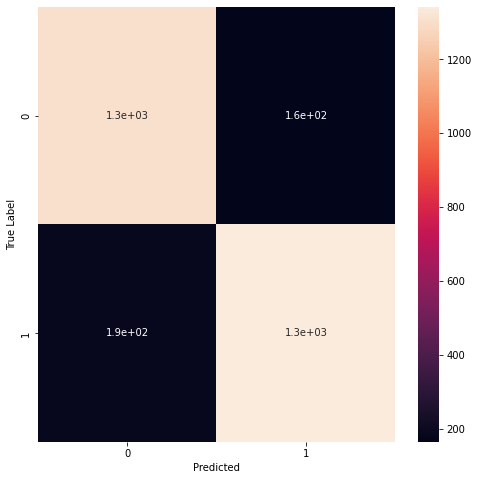

In [ ]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

col = [ i for i in range(0,2)] #類別名稱

df_cm = pd.DataFrame(cf_matrix, columns=col, index = col)
df_cm.index.name = 'True Label'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (8,8))
sn.heatmap(df_cm, annot=True)

# Inference

In [ ]:
from transformers import BertTokenizerFast, BertConfig, BertForSequenceClassification

In [ ]:
# **撰寫預測程式**
def QNLI_model(model, question, sentence):
  input_encodings = tokenizer([question], [sentence], padding='max_length', truncation=True, max_length=256)
  input_dataset = Dataset(input_encodings)

  data_collator = default_data_collator
  input_dataloader = DataLoader(input_dataset, collate_fn=data_collator, batch_size=1)  

  accelerator = Accelerator()
  model, input_dataloader = accelerator.prepare(model, input_dataloader)

  for batch in input_dataloader:
    outputs = model(**batch)
    predicted = outputs.logits.argmax(dim=-1)
  return predicted

In [ ]:
print(validation_data['question'][88])
print(validation_data['sentence'][88])
print(validation_data['label'][88])

print(validation_data['question'][888])
print(validation_data['sentence'][888])
print(validation_data['label'][888])

What was the Marburg Colloquy meant to establish?
Agreement was achieved on fourteen points out of fifteen, the exception being the nature of the Eucharist – the sacrament of the Lord's Supper—an issue crucial to Luther.
1
According to the humoral theory of immunity, what were the bodies immune agents?
In contrast, the humoral theory of immunity, held, among others, by Robert Koch and Emil von Behring, stated that the active immune agents were soluble components (molecules) found in the organism’s “humors” rather than its cells.
0


In [ ]:
question = "who is the author of harry potter?"
sentence = "Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling."

predict = QNLI_model(model, question, sentence)
print("question : ", question)
print("answer : ", sentence)

print("predict_label : ", predict.item())
if predict.item():
  print("not_entailmenat")
else:
  print("entailment")

question :  who is the author of harry potter?
answer :  Harry Potter is a series of seven fantasy novels written by British author J. K. Rowling.
predict_label :  0
entailment
